# DTEK0042 Exercise 3
    Group Members:
    1. Olivia "Ooukka" Oukka
    2. Svante "Svantesodergard" Södergård
    3. Jani "Norppa" Norrby

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a PPG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given PPG signal. Please provide caption and description for every figure. 

## 1- library Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

# 2- Data Import and plotting
* Import the PPG signal data “PPG_record.txt” into your python environment and store it in a variable named “PPG_data”.
* The first column contains timestamp of samples, the second one contains red, the third one contains infrared (IR), and the last column contains green sensor data. 
* Take IR signal and store it in a variable called “PPG_sig”.  
* Note: the sampling frequency of this signal is 132 Hz. 
* Plot the IR signal stored in "PPG_sig" VS Time in seconds
* When plotting the data "PPG_sig" vs time in seconds, use the function np.linspace to make a seconds array using the length of "PPG_sig" and the sampling frequency of 132 Hz. Do not use the timestamp column of the data.

     HINT: 
         PPG_data = np.loadtxt(the directory of the PPG Data) 
         
         or
         
         PPG_data = pd.read_csv(the directory of the PPG Data, names = [name for each column])
         * Note: If you are using pandas to load into data, we'd recommend you convert pandas series data to numpy type for further analysis

PPG data shape: (43404, 4)
First 5 rows of PPG data:
 [[1.57253573e+09 1.09194000e+05 1.54836000e+05 5.07500000e+03]
 [1.57253573e+09 1.09190000e+05 1.54820000e+05 5.10700000e+03]
 [1.57253573e+09 1.09210000e+05 1.54852000e+05 5.07600000e+03]
 [1.57253573e+09 1.09225000e+05 1.54809000e+05 5.09500000e+03]
 [1.57253573e+09 1.09226000e+05 1.54785000e+05 5.09600000e+03]]
Data in the third (IR) column: 
[154836. 154820. 154852. ... 157941. 157922. 157884.]


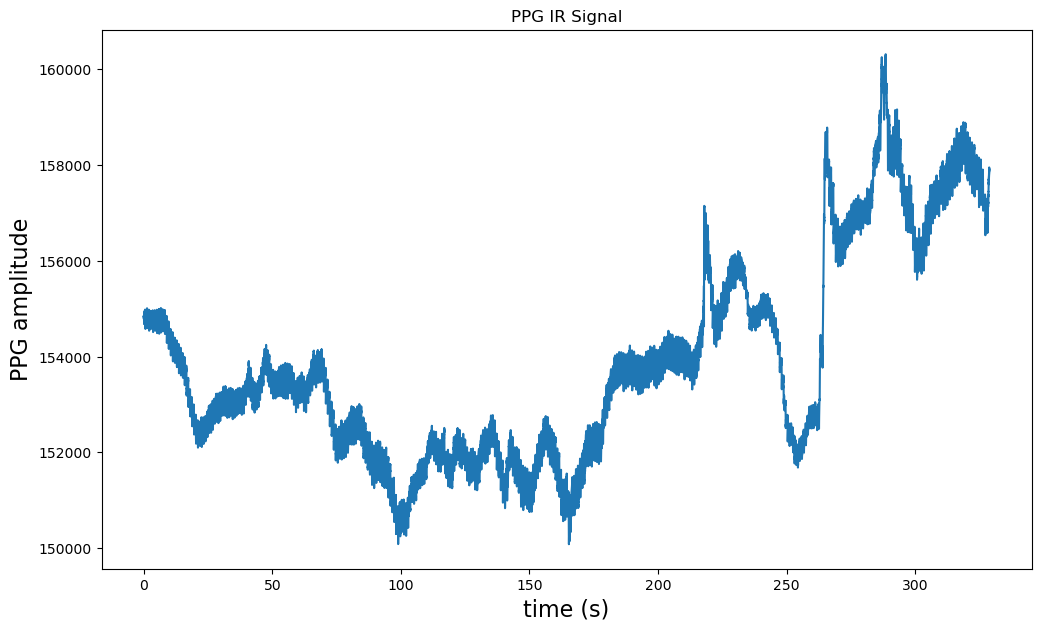

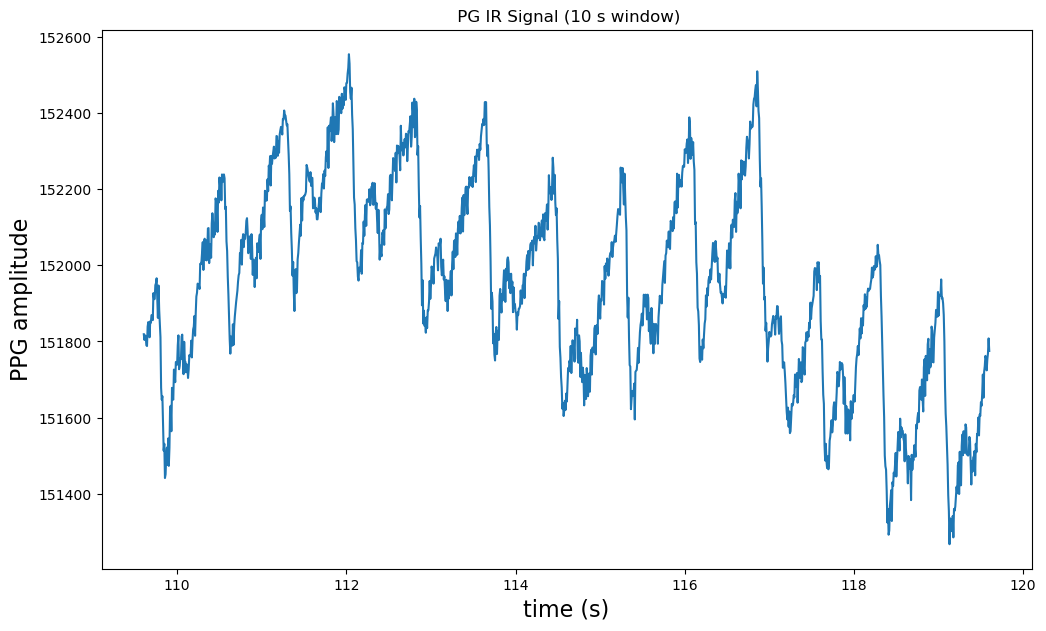

In [3]:

PPG_data = np.loadtxt('PPG_record.txt', delimiter= ',')
Fs = 132

print('PPG data shape:', PPG_data.shape)
print('First 5 rows of PPG data:\n', PPG_data[:5])

print("Data in the third (IR) column: ")
PPG_sig = PPG_data[:, 2]
print(PPG_sig)

t = np.linspace(0, len(PPG_sig) / Fs, len(PPG_sig), endpoint=False)

plt.figure(figsize=(12,7))
plt.plot(t, PPG_sig)
plt.title("PPG IR Signal")
plt.xlabel("time (s)", fontsize = 16)
plt.ylabel("PPG amplitude", fontsize = 16)
plt.show()


# zoomed in view for better visualization

time_window = 10
start_i = int(len(t) / 3)
end_i = start_i + int(Fs * time_window)

plt.figure(figsize=(12,7))
plt.plot(t[start_i:end_i], PPG_sig[start_i:end_i])
plt.title(" PG IR Signal (10 s window)")
plt.xlabel("time (s)", fontsize = 16)
plt.ylabel("PPG amplitude", fontsize = 16)
plt.show()

# 3- Compute power spectral density (PSD)

 * Compute power spectral density (PSD) using the Welch method provided by scipy package.  Select only the frequencies between 0.7 and 3Hz since the human heart rate typically does not go beyond these limits. 
 * Plot the limited PSD versus frequency
 * Find the dominant PSD value and its corresponding frequency. 
 * Store the value of the found frequency component in a variable named “dominant_freq”. 
 * Reference:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch
 
      
      HINT: 
        PSD_freqs , PSD = scipy.signal.welch() 
        Set the nperseg parameter to be = 10*Fs
        

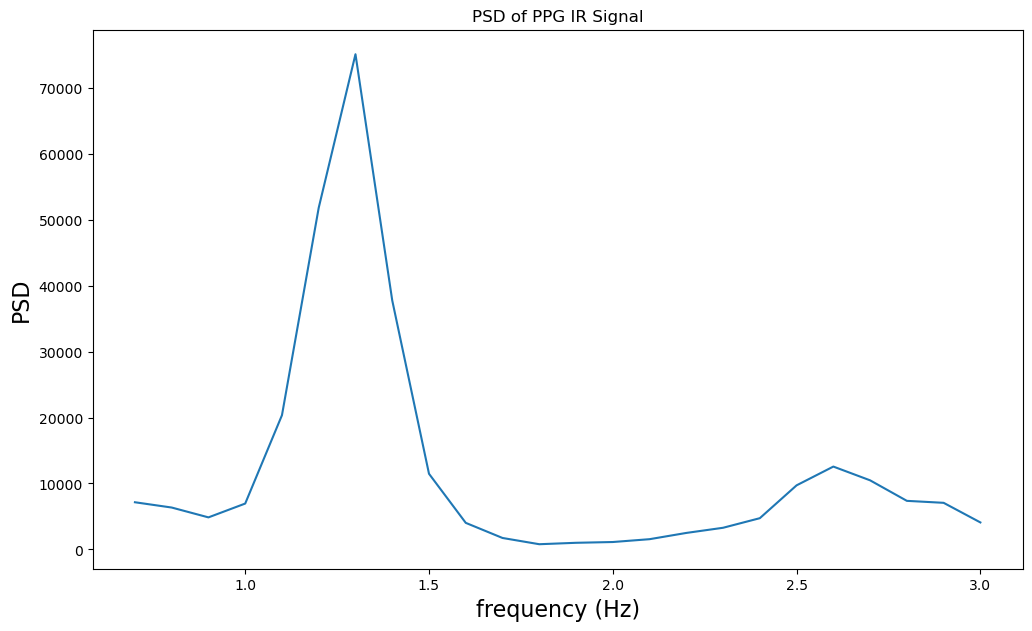

The dominant frequency component is: 1.3
The dominant PSD value is: 75103.19231029777


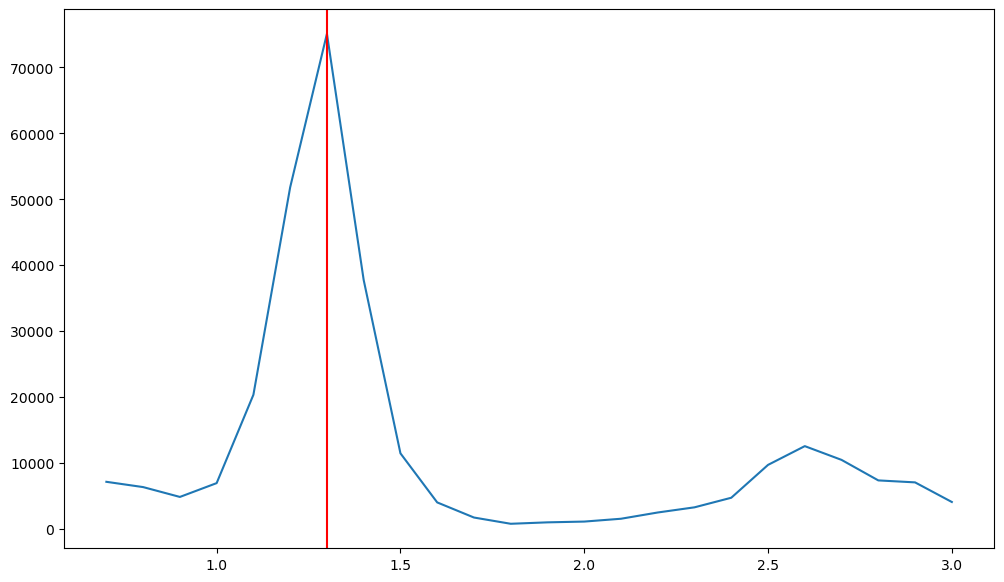

In [4]:
PSD_freqs, PSD = scipy.signal.welch(PPG_sig, Fs, nperseg=10*Fs)

freq_mask = (PSD_freqs >= 0.7) & (PSD_freqs <= 3)
PSD_freqs = PSD_freqs[freq_mask] # only take frequencies between 0.7 and 3Hz
PSD = PSD[freq_mask]

plt.figure(figsize=(12,7))
plt.plot(PSD_freqs, PSD)
plt.title("PSD of PPG IR Signal")
plt.xlabel("frequency (Hz)", fontsize = 16)
plt.ylabel("PSD", fontsize = 16)
plt.show()

peaks = scipy.signal.find_peaks(PSD)
dominant_peak_index = peaks[0][np.argmax(PSD[peaks[0]])]
dominant_freq = PSD_freqs[dominant_peak_index]

print("The dominant frequency component is:", dominant_freq)
print("The dominant PSD value is:", PSD[dominant_peak_index])

plt.figure(figsize=(12,7))
plt.plot(PSD_freqs, PSD)
plt.axvline(dominant_freq, color='r')
plt.show()


# 4- Band Pass Filter Design and Filtering of PPG signal
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to (dominant_freq – 0.3) and (dominant_freq + 0.3).

* Filter the original PPG signal with the designed filter. 

* Plot the filtered PPG signal showing heartbeats in the form of a sinusoid


* Note: the documentation of scipy package online is very comprehensive and informative. there are examples that 
  you can easily follow and use to solve the given exercise here. 
  https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html    
    
   
      HINT: 
        from scipy.signal import butter, filtfilt, freqz
    

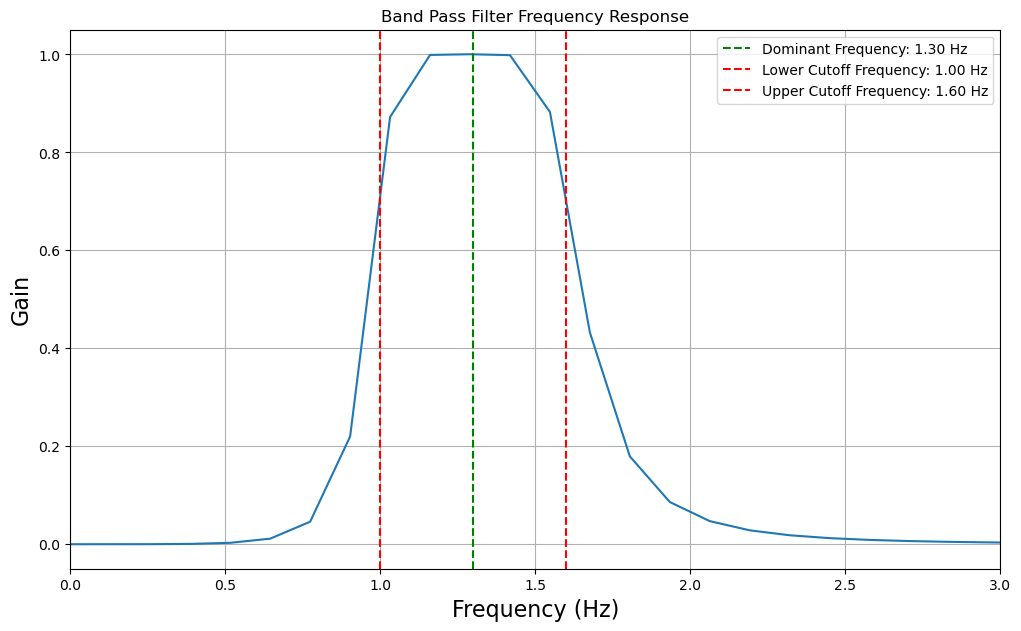

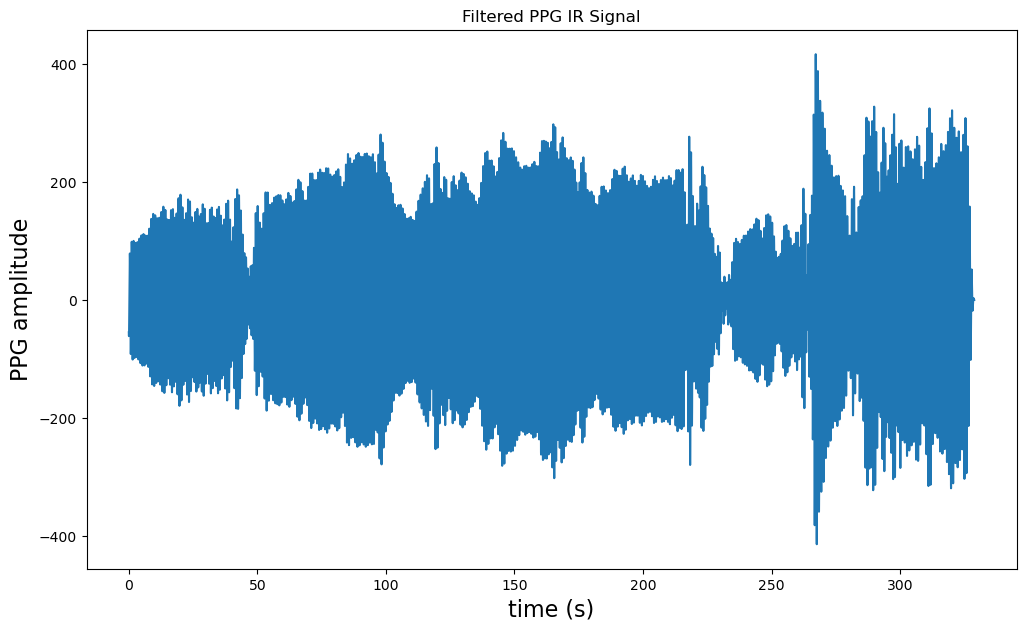

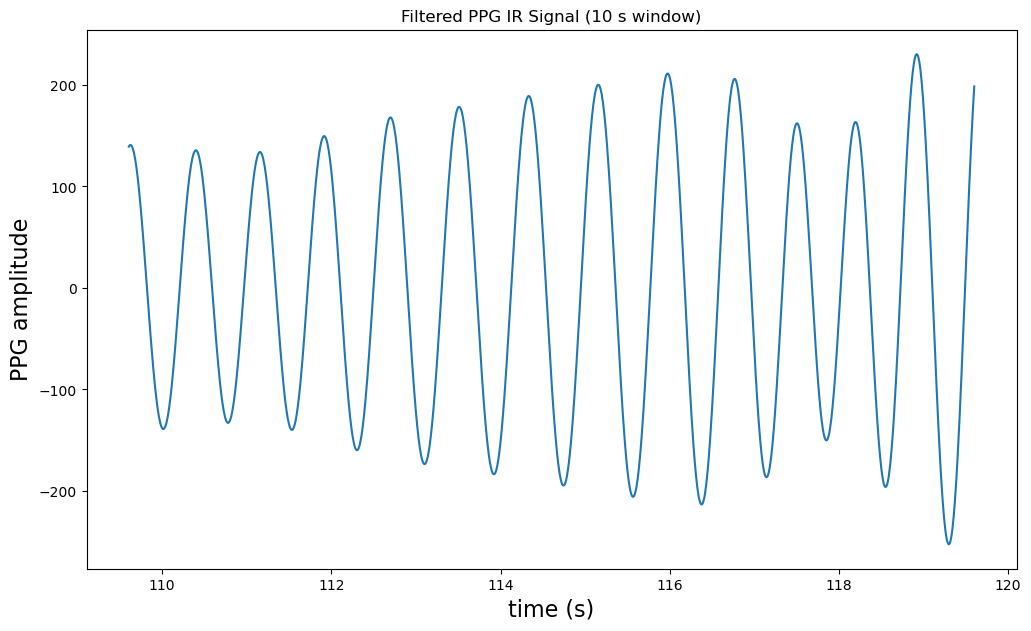

In [5]:
from scipy.signal import butter, filtfilt, freqz

b, a = butter(4, [dominant_freq - 0.3, dominant_freq + 0.3], btype='band', fs=Fs)


# visualise bandpass filter and frequency response
w, h = freqz(b, a, fs=Fs)
plt.figure(figsize=(12,7))
plt.plot(w, np.abs(h))
plt.title("Band Pass Filter Frequency Response")
plt.xlabel("Frequency (Hz)", fontsize = 16)
plt.ylabel("Gain", fontsize = 16)
plt.axvline(dominant_freq, color='g', linestyle='--', label=f'Dominant Frequency: {dominant_freq:.2f} Hz')
plt.axvline(dominant_freq - 0.3, color='r', linestyle='--', label=f'Lower Cutoff Frequency: {dominant_freq - 0.3:.2f} Hz')
plt.axvline(dominant_freq + 0.3, color='r', linestyle='--', label=f'Upper Cutoff Frequency: {dominant_freq + 0.3:.2f} Hz')
plt.grid(True)
plt.legend()
plt.xlim(0, 3)
plt.show()

filtered_PPG = filtfilt(b, a, PPG_sig)

plt.figure(figsize=(12,7))
plt.plot(t, filtered_PPG)
plt.title("Filtered PPG IR Signal")
plt.xlabel("time (s)", fontsize = 16)
plt.ylabel("PPG amplitude", fontsize = 16)
plt.show()


# help visualise the heartbeat in the filtered signal by taking a smaller time window
time_window = 10
start_i = int(len(t) / 3)
end_i = start_i + int(Fs * time_window)

plt.figure(figsize=(12,7))
plt.plot(t[start_i:end_i], filtered_PPG[start_i:end_i])
plt.title("Filtered PPG IR Signal (10 s window)")
plt.xlabel("time (s)", fontsize = 16)
plt.ylabel("PPG amplitude", fontsize = 16)
plt.show()



## Observations:

The dominant frequency appears to be around 1.3 Hz, which is within the expected range for human heart rates (42-100 bpm). 1.3 Hz translates to a heart rate of approximately 78 bpm, which would also be a typical resting heart rate for the majority of adults.

The bandpass filter has cutoff frequencies of approximately 1.0 Hz and 1.6 Hz, which effectively isolates the heart rate signal while filtering out noise and other irrelevant frequency components. This can be seen in the signal (especially the zoomed in time window) where the heartbeats are more pronounced and sinusoidal in nature.

# 5- Find the maximum extrema points (or peaks) of the signal
* The distance between every two consecutive peak location correlates with the RR interval.
* Find the peaks of the filtered signal in the time domain.
* Calculate these peak-to-peak intervals, store it in a variable named “RR_intervals” and report the average value of these intervals. 
* Convert the computed average value to heart rate as shown below and report it
* You can use “argrelextrema” function in scipy package for peak detection
* Plot Filtered PPG With peak locations
* Describe your observations below
* Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html

      HINT:
        from scipy.signal import argrelextrema
        HeartRate = 60.0/avg_peak_intervals 

Average RR interval: 764.83 ms
Estimated Heart Rate: 78.45 bpm


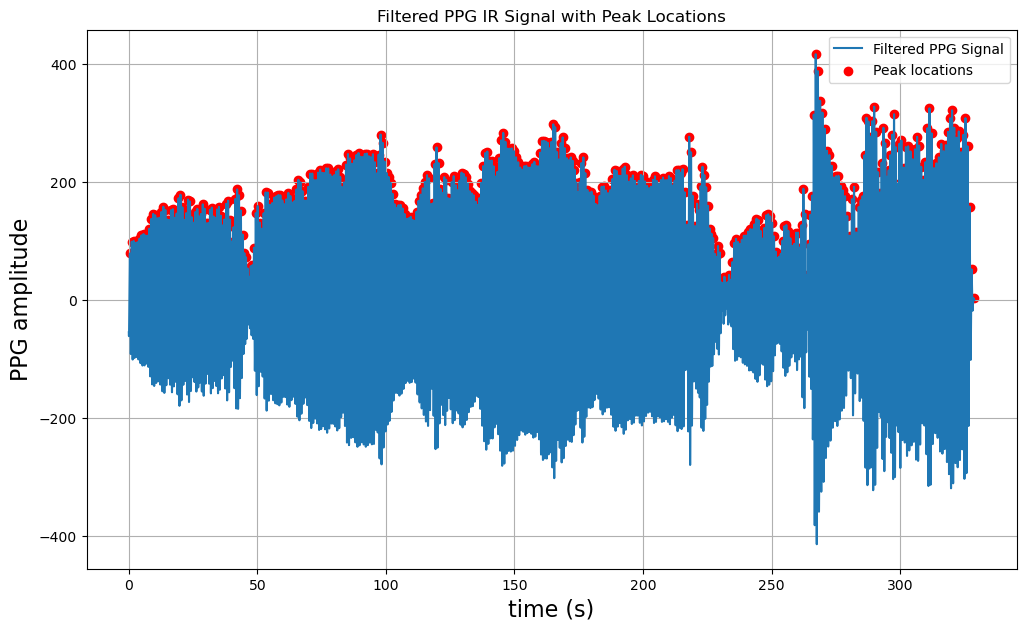

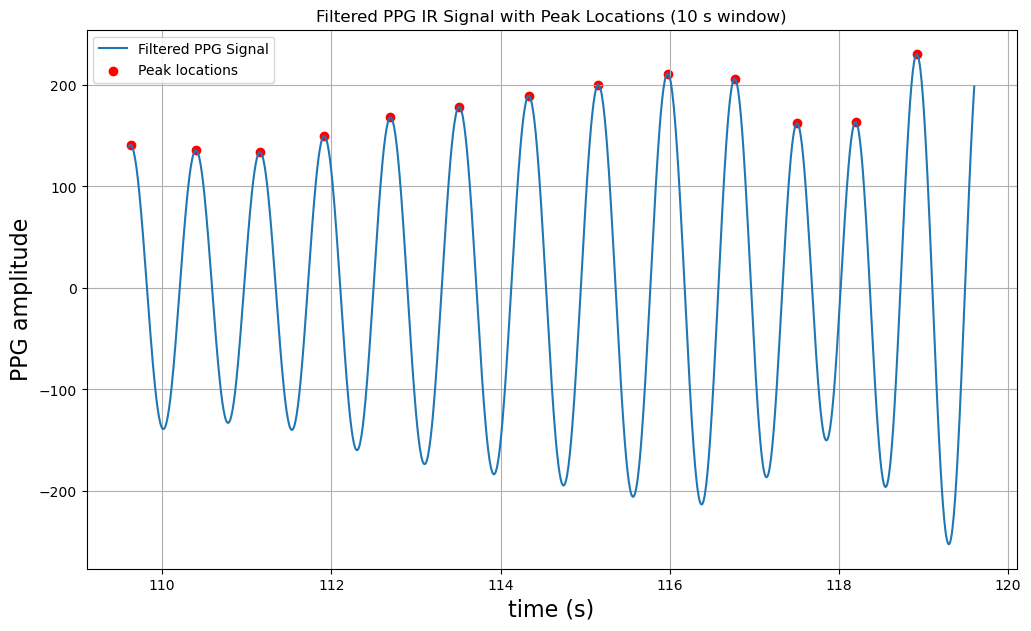

In [6]:
from scipy.signal import argrelextrema

peak_indices = argrelextrema(filtered_PPG, np.greater)[0]

RR_intervals = np.diff(t[peak_indices])

avg_peak_intervals = np.mean(RR_intervals)
avg_rr_intervals_ms = avg_peak_intervals * 1000

HeartRate = 60.0 / avg_peak_intervals

print(f'Average RR interval: {avg_rr_intervals_ms:.2f} ms')
print(f'Estimated Heart Rate: {HeartRate:.2f} bpm')

plt.figure(figsize=(12,7))
plt.plot(t, filtered_PPG, label='Filtered PPG Signal')
plt.scatter(t[peak_indices], filtered_PPG[peak_indices], color='r', label='Peak locations')
plt.title("Filtered PPG IR Signal with Peak Locations")
plt.xlabel("time (s)", fontsize = 16)
plt.ylabel("PPG amplitude", fontsize = 16)
plt.grid(True)
plt.legend()
plt.show()

# 10 s window

window_peaks = peak_indices[(peak_indices >= start_i) & (peak_indices < end_i)]

plt.figure(figsize=(12,7))
plt.plot(t[start_i:end_i], filtered_PPG[start_i:end_i], label='Filtered PPG Signal')
plt.scatter(t[window_peaks], filtered_PPG[window_peaks], color='r', label='Peak locations')
plt.title("Filtered PPG IR Signal with Peak Locations (10 s window)")
plt.xlabel("time (s)", fontsize = 16)
plt.ylabel("PPG amplitude", fontsize = 16)
plt.grid(True)
plt.legend()
plt.show()

## Observations: 

Using Scipy's argrelextrema function, we identified the peaks from the filtered PPG signal. The average RR interval was calculated to be approximately 764.83 ms. This corresponds to the estimated heart rate of about 78.45 bpm, which aligns well with the dominant frequency we observed from the earlier PSD analysis (1.3 Hz). Looking at the filtered signal there are still variations in the amplitude of the peaks, which could be due to physiological factors or noise in the signal. However, the overall periodicity is clear, indivating consistent heartbeat across the recording duration.

# 6- Calculate SDNN and RMSSD
* AVNN is average of the time interval between successive normal heart beats. 
* SDNN is standard deviation of the time interval between successive normal heart beats (i.e. the RR-intervals).
* RMSSD is the Root mean square of successive RR interval differences.

* Calculate AVNN, SDNN and RMSSD from the “RR_intervals” variable. 
* These are heart rate variability parameters. Report the AVNN, SDNN and RMSSD values. 
* RMSSD formula can be found in https://www.biopac.com/application/ecg-cardiology/advanced-feature/rmssd-for-hrv-analysis/

* Note: Time unit for intervals should be in millisecond.
   
   HINT:
        Use np.diff(RR_intervals) to calculate the difference between successive rr intervals
        Use np.std() for SDNN
        

In [13]:

# all values in ms
avnn = np.mean(RR_intervals) * 1000
sdnn = np.std(RR_intervals) * 1000
rmssd = np.sqrt(np.mean(np.square(np.diff(RR_intervals)))) * 1000


print(f'AVNN (ms): {avnn:.2f}')
print(f'SDNN (ms): {sdnn:.2f}')
print(f'RMSSD (ms): {rmssd:.2f}')

AVNN (ms): 764.83
SDNN (ms): 64.59
RMSSD (ms): 34.36


## Observations:

The RMSSD value seems to be in range for a healthy adult, most likely a person that is older than 20-year-olds. RMSSD values vary widely between age groups and even within individuals, but generally, higher RMSSD values are associated with better cardiovascular health and greater parasympathetic (vagal) activity. RMSSD values also tend to decrease with age.

The AVNN value of approximately 764 ms corresponds to an average heart rate of around 78 beats per minute, which is also supported by the previous heart rate calculations. There is a good consistency between the AVNN-derived heart rate and the heart rate estimated from the dominant frequency in the PSD analysis.

The SDNN value of approximately 64.59 ms indicates compromised health, according to the [Shaffer and Ginsberg][1] classification. According to the same classification, SDNN values of 100 ms or greater are considered good for a healthy adult.

[1]: https://doi.org/10.3389/fpubh.2017.00258